In [4]:
# Importing dependencies:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import keras as k
import warnings
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Installed all dependencies!')

ModuleNotFoundError: No module named 'plotly'

In [5]:
df=pd.read_csv("kiva_loans.csv")
print(df)


           id  funded_amount  loan_amount               activity  \
0      653051            300          300    Fruits & Vegetables   
1      653053            575          575               Rickshaw   
2      653068            150          150         Transportation   
3      653063            200          200             Embroidery   
4      653084            400          400             Milk Sales   
...       ...            ...          ...                    ...   
19291  672071            900          900                 Health   
19292  671702            500          500          General Store   
19293  671522           1100         1100  Food Production/Sales   
19294  671692            775          775          General Store   
19295  671618           5675         5675                Cereals   

               sector                                                use  \
0                Food            To buy seasonal, fresh fruits to sell.    
1      Transportation  to repai

In [6]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,01-01-2014
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,01-01-2014
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,01-01-2014
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,01-01-2014
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,01-01-2014


In [7]:
df.tail()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
19291,672071,900,900,Health,Health,To provide communities with free access to chl...,KE,Kenya,Vihiga,USD,324.0,2014-02-18 13:31:53+00:00,2014-02-05 08:00:00+00:00,2014-03-01 22:54:54+00:00,68,34,"#Low-profit FP, user_favorite","female, female, female",irregular,18-02-2014
19292,671702,500,500,General Store,Retail,to set up a general store for her son.,PK,Pakistan,Lahore,PKR,247.0,2014-02-18 07:56:54+00:00,2014-01-29 08:00:00+00:00,2014-02-20 11:13:01+00:00,12,17,NaN,female,irregular,18-02-2014
19293,671522,1100,1100,Food Production/Sales,Food,to buy quail eggs.,EC,Ecuador,Azogues,USD,137.0,2014-02-18 01:38:57+00:00,2014-01-31 08:00:00+00:00,2014-02-22 10:00:58+00:00,8,38,NaN,female,irregular,18-02-2014
19294,671692,775,775,General Store,Retail,"To purchase a variety of goods, such as rice a...",PK,Pakistan,Lahore,PKR,247.0,2014-02-18 07:43:18+00:00,2014-01-28 08:00:00+00:00,2014-02-19 16:41:55+00:00,12,27,NaN,"female, female",irregular,18-02-2014
19295,671618,5675,5675,Cereals,Food,to buy maize to sell.,UG,Uganda,Kagadi,UGX,163.0,2014-02-18 05:57:17+00:00,2014-02-12 08:00:00+00:00,2014-02-19 15:46:58+00:00,8,186,"user_favorite, #Schooling, #Parent, #Vegan","male, male, male, male, female, male, male, ma...",NaN,NaN


In [8]:
df.columns = [x.lower() for x in df.columns]



In [9]:
print('kiva_loans Shape: ', df.shape)
print('-' * 40)
print(pd.DataFrame(df.info()))

kiva_loans Shape:  (19296, 20)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19296 entries, 0 to 19295
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19296 non-null  int64  
 1   funded_amount       19296 non-null  int64  
 2   loan_amount         19296 non-null  int64  
 3   activity            19296 non-null  object 
 4   sector              19296 non-null  object 
 5   use                 19093 non-null  object 
 6   country_code        19296 non-null  object 
 7   country             19296 non-null  object 
 8   region              17240 non-null  object 
 9   currency            19296 non-null  object 
 10  partner_id          18897 non-null  float64
 11  posted_time         19296 non-null  object 
 12  disbursed_time      19278 non-null  object 
 13  funded_time         18850 non-null  object 
 14  term_in_months      19296 non-

In [10]:
df.describe(include=['O'])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,19296,19296,19093,19296,19296,17240,19296,19296,19278,18850,10573,19093,19295,19295
unique,152,15,16110,63,63,2073,50,19274,386,16315,3746,448,4,49
top,General Store,Food,"To purchase a mobile phone, solar charging set...",PH,Philippines,Lahore,USD,2014-02-07 12:32:18+00:00,2014-01-17 08:00:00+00:00,2014-02-26 03:40:57+00:00,user_favorite,female,monthly,17-02-2014
freq,1859,4389,51,3731,3731,383,3966,2,703,14,1284,12362,10357,874


In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y') # Specify the correct date format
df['year'] = pd.DataFrame(df['date'].dt.year)
df['month'] = pd.DataFrame(df['date'].dt.month)
df['day'] = pd.DataFrame(df['date'].dt.day)
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,year,month,day
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,2014-01-01,2014.0,1.0,1.0
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,2014-01-01,2014.0,1.0,1.0
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,2014-01-01,2014.0,1.0,1.0
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,2014-01-01,2014.0,1.0,1.0
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,2014-01-01,2014.0,1.0,1.0


In [12]:
df.isna().sum()

id                       0
funded_amount            0
loan_amount              0
activity                 0
sector                   0
use                    203
country_code             0
country                  0
region                2056
currency                 0
partner_id             399
posted_time              0
disbursed_time          18
funded_time            446
term_in_months           0
lender_count             0
tags                  8723
borrower_genders       203
repayment_interval       1
date                     1
year                     1
month                    1
day                      1
dtype: int64

In [13]:
df.isna().mean()

id                    0.000000
funded_amount         0.000000
loan_amount           0.000000
activity              0.000000
sector                0.000000
use                   0.010520
country_code          0.000000
country               0.000000
region                0.106551
currency              0.000000
partner_id            0.020678
posted_time           0.000000
disbursed_time        0.000933
funded_time           0.023114
term_in_months        0.000000
lender_count          0.000000
tags                  0.452063
borrower_genders      0.010520
repayment_interval    0.000052
date                  0.000052
year                  0.000052
month                 0.000052
day                   0.000052
dtype: float64

In [14]:
null_values = df.isnull().sum()
null_values.columns = ['total_null']
total_cells = np.prod(df.shape)
missing_values = null_values.sum()

print('Only ', (missing_values/total_cells) * 100, 'of the dataset is missing.')

Only  2.7158140457134614 of the dataset is missing.


In [15]:
#Analyzing KIVA_LOANS :

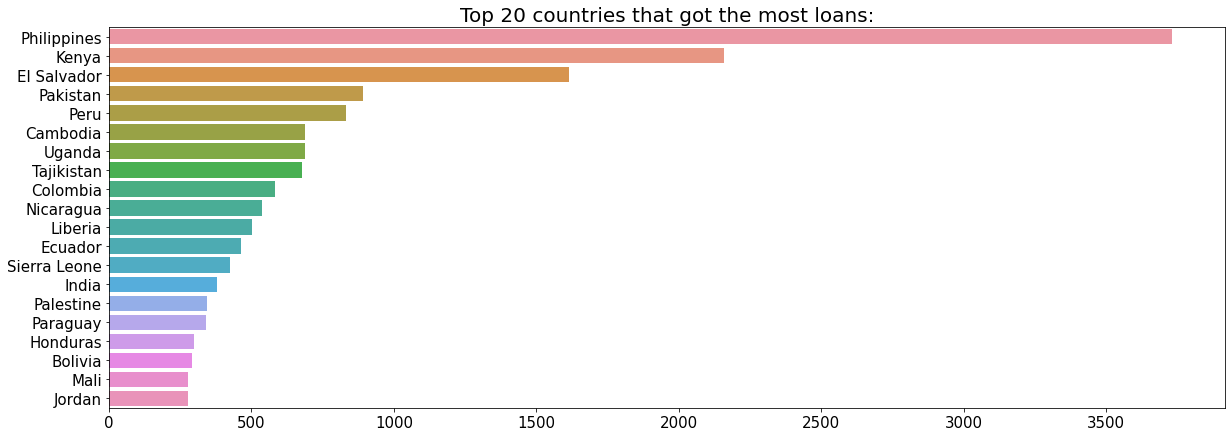

In [16]:
kiva_loans_countries = pd.DataFrame(df['country'].value_counts(sort=['loan_amount']))
kiva_loans_countries.reset_index(inplace=True)
kiva_loans_countries.columns = ['country', 'total_loaned']

plt.figure(figsize=(20, 7))

barplot = sns.barplot(x=kiva_loans_countries['total_loaned'][:20], y=kiva_loans_countries['country'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 countries that got the most loans:', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

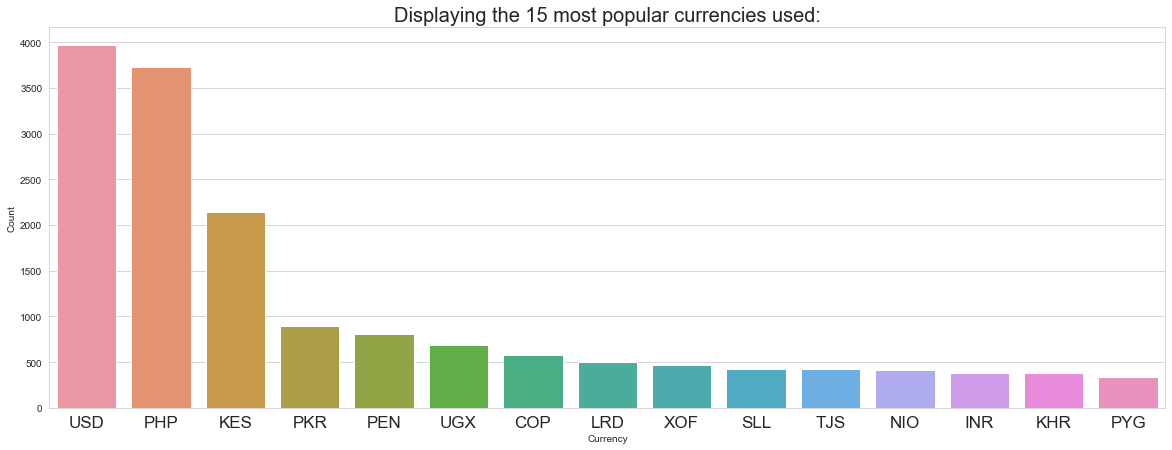

In [18]:
df= pd.read_csv('kiva_loans.csv')

kiva_currency = df['currency'].value_counts().reset_index()
kiva_currency.columns = ['currency', 'count']

plt.figure(figsize=(20, 7))
sns.set_style("whitegrid")
barplot = sns.barplot(x=kiva_currency['currency'][:15], y=kiva_currency['count'][:15])
barplot.set(xlabel='Currency', ylabel='Count')
plt.title('Displaying the 15 most popular currencies used:', fontsize=20)
plt.xticks(fontsize=17)
plt.show()

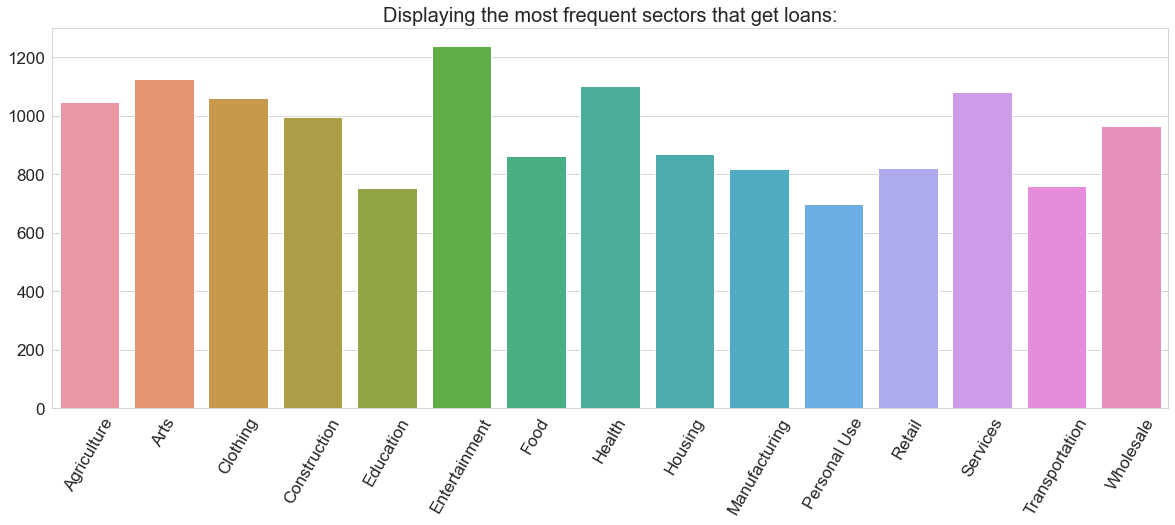

In [19]:
kiva_loans_sectors = pd.DataFrame(df.groupby(['sector'])['loan_amount'].mean())
kiva_loans_sectors.reset_index(inplace=True)
kiva_loans_sectors.columns = ['sector', 'average_frequent_sectors']

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.barplot(x='sector', y='average_frequent_sectors', data=kiva_loans_sectors)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying the most frequent sectors that get loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

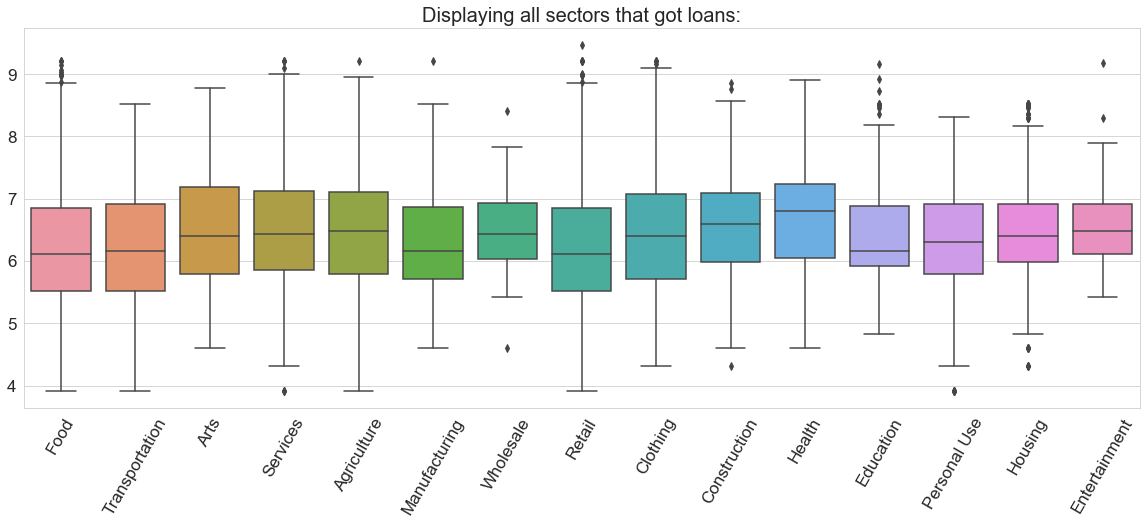

In [20]:
df['loan_amount_log'] = np.log(df['loan_amount'])
plt.figure(figsize=(20, 7))
sns.set_style("whitegrid")
boxplot = sns.boxplot(x='sector', y='loan_amount_log', data=df)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying all sectors that got loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()


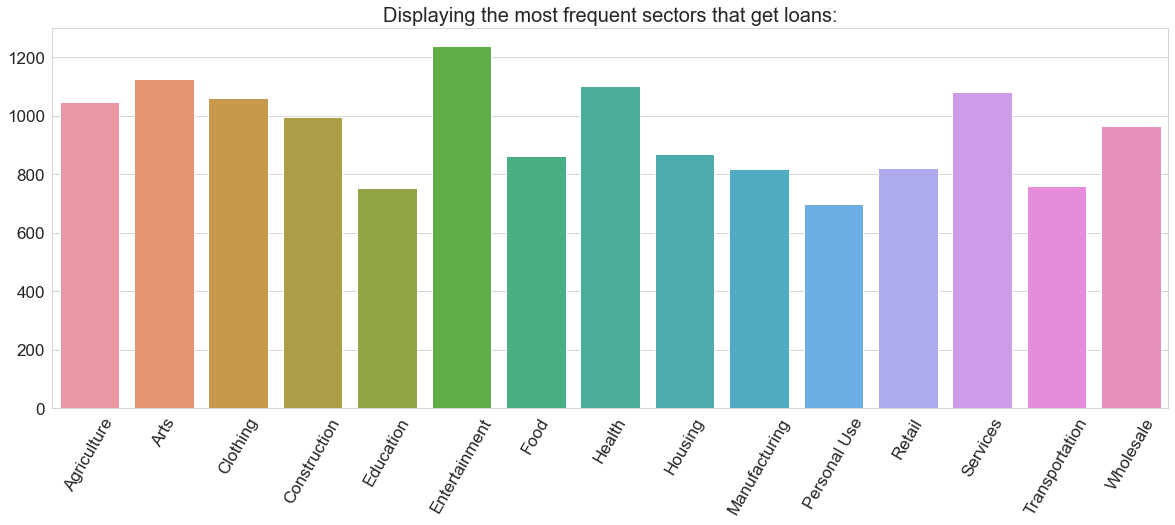

In [21]:
kiva_loans_sectors = pd.DataFrame(df.groupby(['sector'])['loan_amount'].mean())
kiva_loans_sectors.reset_index(inplace=True)
kiva_loans_sectors.columns = ['sector', 'average_frequent_sectors']

plt.figure(figsize=(20, 7))

sns.set_style("whitegrid")
boxplot = sns.barplot(x='sector', y='average_frequent_sectors', data=kiva_loans_sectors)
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying the most frequent sectors that get loans:', fontsize=20)
plt.xticks(rotation=60, fontsize=17)
plt.yticks(fontsize=17)
plt.show()

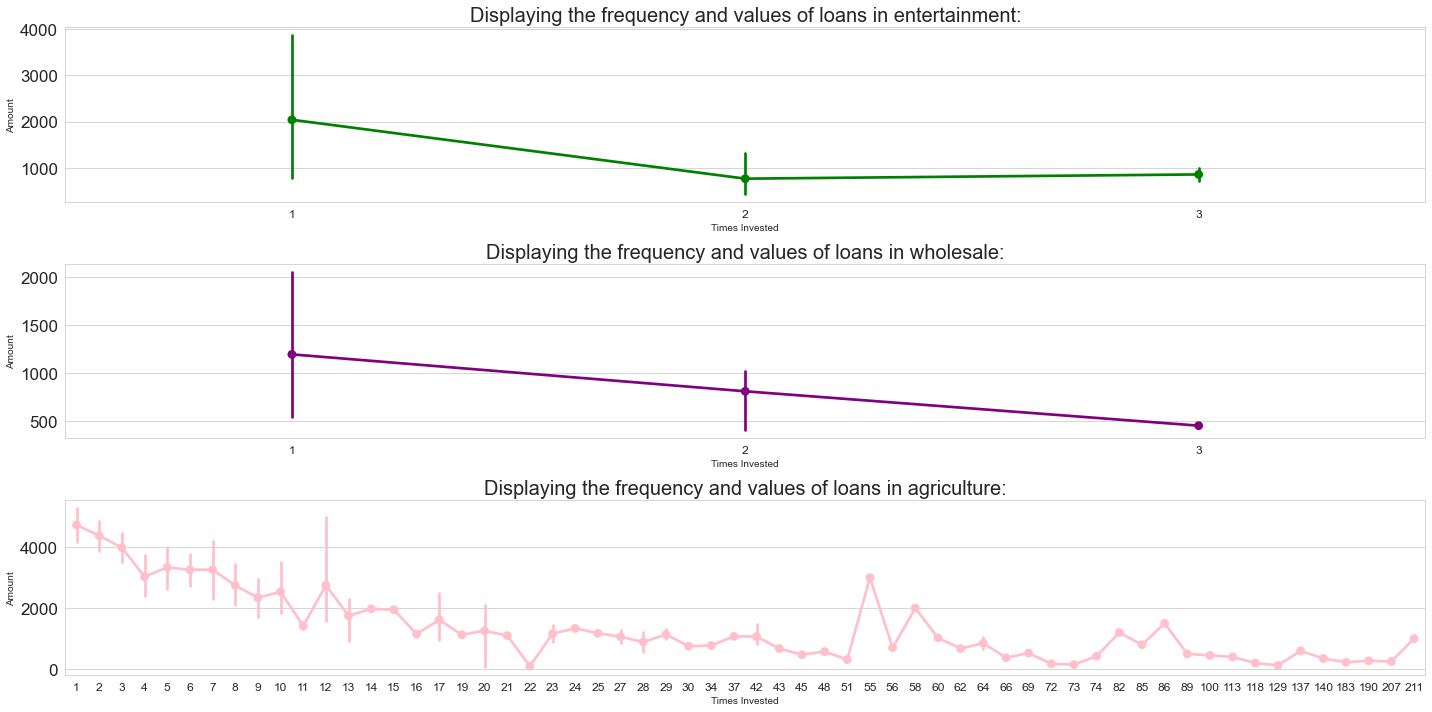

In [22]:
kiva_loans_counting_entertainment = pd.DataFrame(df[df['sector'] == 'Entertainment']['loan_amount'].value_counts())
kiva_loans_counting_entertainment.reset_index(inplace=True)
kiva_loans_counting_entertainment.columns = ['total_amount', 'times_invested']
kiva_loans_counting_wholesale = pd.DataFrame(df[df['sector'] == 'Wholesale']['loan_amount'].value_counts())
kiva_loans_counting_wholesale.reset_index(inplace=True)
kiva_loans_counting_wholesale.columns = ['total_amount', 'times_invested']
kiva_loans_counting_agriculture = pd.DataFrame(df[df['sector'] == 'Agriculture']['loan_amount'].value_counts())
kiva_loans_counting_agriculture.reset_index(inplace=True)
kiva_loans_counting_agriculture.columns = ['total_amount', 'times_invested']

fig = plt.figure(figsize=(20, 10))
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 17

plt.subplot(311)
ax1 = sns.pointplot(x=kiva_loans_counting_entertainment['times_invested'], y=kiva_loans_counting_entertainment['total_amount'], color='green')
ax1.set(xlabel='Times Invested', ylabel='Amount')
ax1.set_title('Displaying the frequency and values of loans in entertainment:', fontsize=20)

plt.subplot(312)
ax1 = sns.pointplot(x=kiva_loans_counting_wholesale['times_invested'], y=kiva_loans_counting_wholesale['total_amount'], color='purple')
ax1.set(xlabel='Times Invested', ylabel='Amount')
ax1.set_title('Displaying the frequency and values of loans in wholesale:', fontsize=20)

plt.subplot(313)
ax2 = sns.pointplot(x=kiva_loans_counting_agriculture['times_invested'], y=kiva_loans_counting_agriculture['total_amount'], color='pink')
ax2.set(xlabel='Times Invested', ylabel='Amount')
ax2.set_title('Displaying the frequency and values of loans in agriculture:', fontsize=20)

plt.tight_layout()
plt.show()

In [23]:
print(df.columns)

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log'],
      dtype='object')


In [24]:
print('year' in df.columns)

False


In [25]:
df.columns = df.columns.str.strip()
print('year' in df.columns)

False


In [26]:
print(df.head())

       id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  ...                posted_time

In [27]:
print(df.shape)

(19296, 21)


C:\Users\bhanuprakash\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bhanuprakash\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


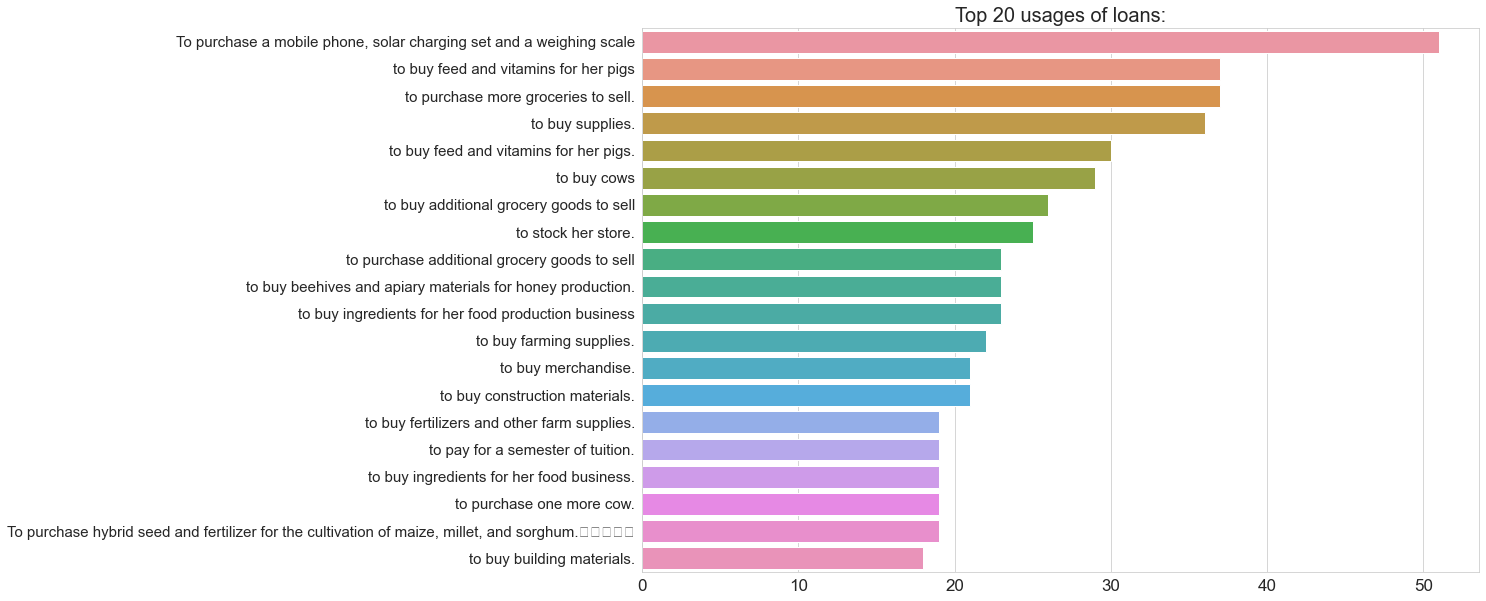

In [28]:
kiva_use = pd.DataFrame(df['use'].value_counts(sort='loan_amount'))
kiva_use.reset_index(inplace=True)
kiva_use.columns = ['use', 'total_amount']

plt.figure(figsize=(15, 10))

barplot = sns.barplot(x=kiva_use['total_amount'][:20], y=kiva_use['use'][:20])
barplot.set(xlabel='', ylabel='')
plt.title('Top 20 usages of loans:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=15)
plt.show()

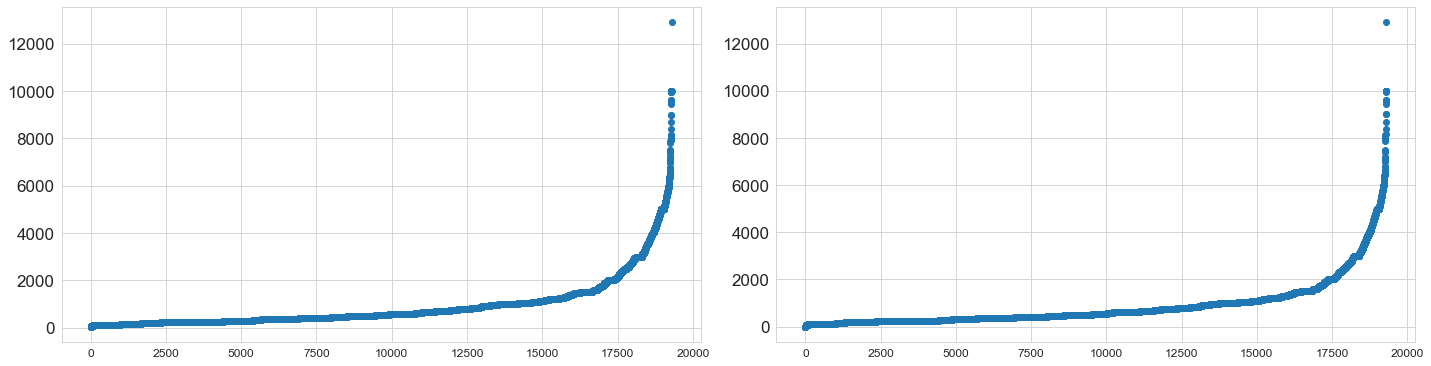

In [29]:
plt.figure(figsize=(20, 10))
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 17

plt.subplot(221)
ax1 = plt.scatter(range(df['sector'].shape[0]), np.sort(df['loan_amount'].values))
# ax1.title('Displaying funding of usage of investments:', fontsize=20)

plt.subplot(222)
ax2 = plt.scatter(range(df['sector'].shape[0]), np.sort(df['funded_amount'].values))
# ax2.title('Displaying funding of usage of investments:', fontsize=20)

plt.tight_layout()
plt.show()

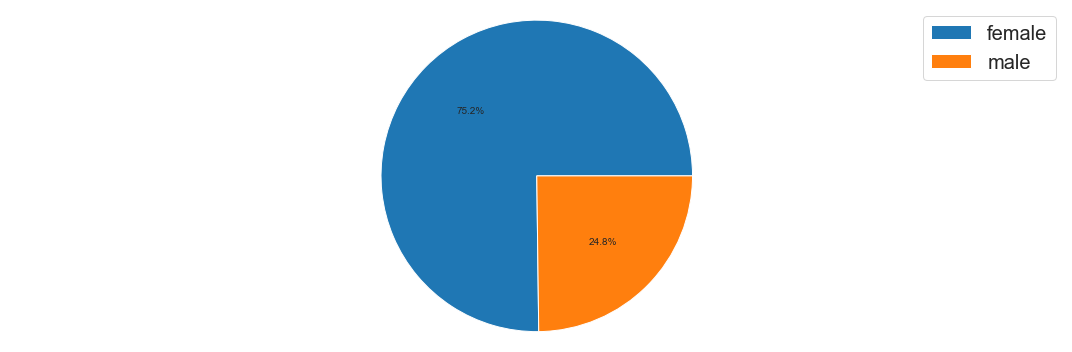

In [30]:
df['borrower_genders'] = df['borrower_genders'].astype(str)
gender_list = pd.DataFrame(df['borrower_genders'].str.split(',').tolist())
df['clean_borrower_genders'] = gender_list[0]
df.loc[df['clean_borrower_genders'] == 'nan', 'clean_borrower_genders'] = np.nan

kiva_gender = df['clean_borrower_genders'].value_counts()
labels = kiva_gender.index

plt.figure(figsize=(15, 5))

patches = plt.pie(kiva_gender, autopct='%1.1f%%')
plt.legend(labels, fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

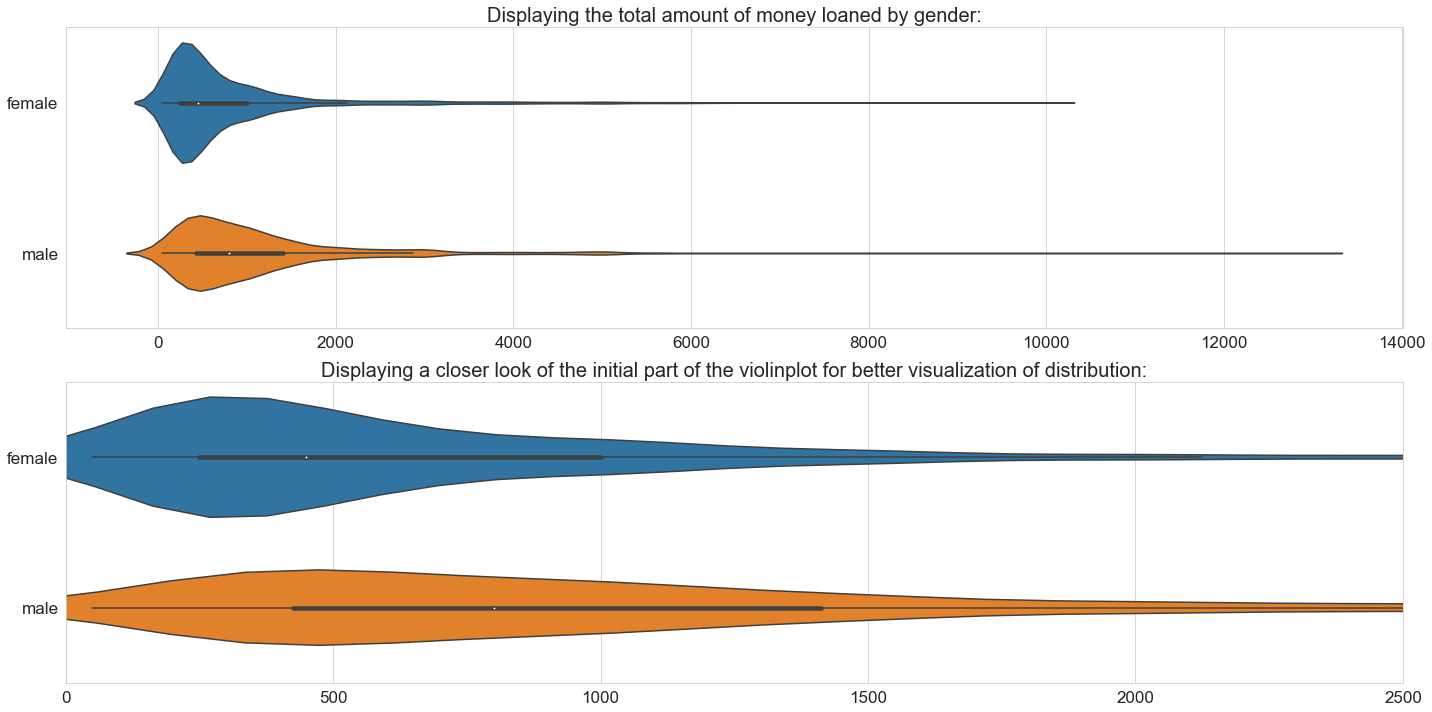

In [31]:
sex_mean = df.groupby('clean_borrower_genders').count()

fig = plt.figure(figsize=(20, 10))
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17

plt.subplot(211)
ax1 = sns.violinplot(x='loan_amount', y='clean_borrower_genders', data=df)
ax1.set(xlabel='', ylabel='')
ax1.set_title('Displaying the total amount of money loaned by gender:', fontsize=20)

plt.subplot(212)
ax2 = sns.violinplot(x='loan_amount', y='clean_borrower_genders', data=df)
ax2.set(xlabel='', ylabel='')
ax2.set_title('Displaying a closer look of the initial part of the violinplot for better visualization of distribution:', fontsize=20)
ax2.set_xlim(0, 2500)

plt.tight_layout()
plt.show()


In [32]:
df.columns


Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')

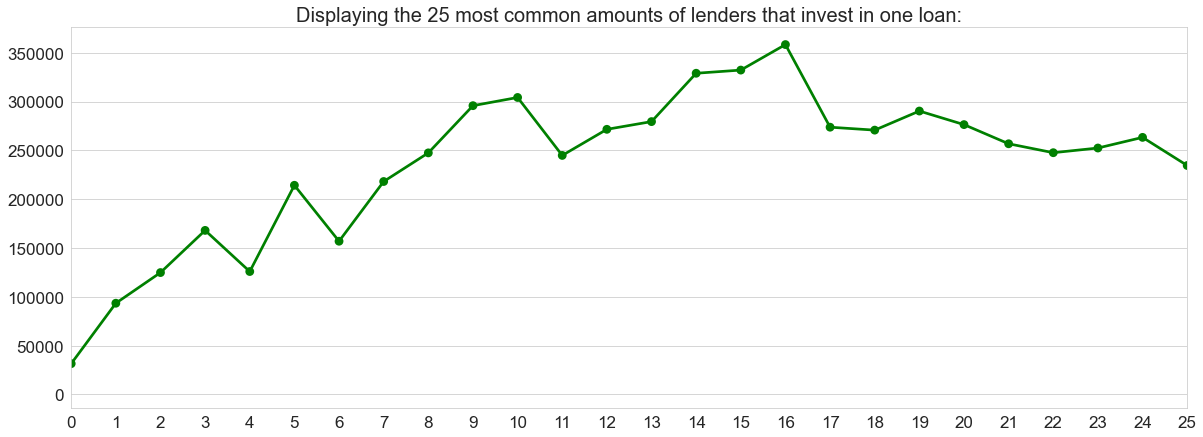

In [34]:
# Assuming your original DataFrame is named original_df
# Calculate the total amount for each lender count
aggregated_df =df.groupby('lender_count')['loan_amount'].sum().reset_index()

# Sort by lenders_count if necessary
aggregated_df = aggregated_df.sort_values(by='lender_count').reset_index(drop=True)

# Plot the data
plt.figure(figsize=(20, 7))

pointplot = sns.pointplot(x=aggregated_df['lender_count'], y=aggregated_df['loan_amount'], color='g')
pointplot.set(xlabel='', ylabel='')
plt.title('Displaying the 25 most common amounts of lenders that invest in one loan:', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlim(0, 25)
plt.show()


In [35]:
import pandas as pd

# Assuming kiva_loans DataFrame is already loaded
print(df.columns)

# Optional: To see the first few rows of the DataFrame
print(df.head())

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')
       id  funded_amount  loan_amount             activity          sector  \
0  653051            300          300  Fruits & Vegetables            Food   
1  653053            575          575             Rickshaw  Transportation   
2  653068            150          150       Transportation  Transportation   
3  653063            200          200           Embroidery            Arts   
4  653084            400          400           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   


In [36]:
print(df.columns)


Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')


In [37]:
df

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,loan_amount_log,clean_borrower_genders
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,NaN,female,irregular,01-01-2014,5.703782,female
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,NaN,"female, female",irregular,01-01-2014,6.354370,female
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43,6,"user_favorite, user_favorite",female,bullet,01-01-2014,5.010635,female
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11,8,NaN,female,irregular,01-01-2014,5.298317,female
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14,16,NaN,female,monthly,01-01-2014,5.991465,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19291,672071,900,900,Health,Health,To provide communities with free access to chl...,KE,Kenya,Vihiga,USD,...,2014-02-05 08:00:00+00:00,2014-03-01 22:54:54+00:00,68,34,"#Low-profit FP, user_favorite","female, female, female",irregular,18-02-2014,6.802395,female
19292,671702,500,500,General Store,Retail,to set up a general store for her son.,PK,Pakistan,Lahore,PKR,...,2014-01-29 08:00:00+00:00,2014-02-20 11:13:01+00:00,12,17,NaN,female,irregular,18-02-2014,6.214608,female
19293,671522,1100,1100,Food Production/Sales,Food,to buy quail eggs.,EC,Ecuador,Azogues,USD,...,2014-01-31 08:00:00+00:00,2014-02-22 10:00:58+00:00,8,38,NaN,female,irregular,18-02-2014,7.003065,female
19294,671692,775,775,General Store,Retail,"To purchase a variety of goods, such as rice a...",PK,Pakistan,Lahore,PKR,...,2014-01-28 08:00:00+00:00,2014-02-19 16:41:55+00:00,12,27,NaN,"female, female",irregular,18-02-2014,6.652863,female


In [38]:
print(df.columns)

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')


In [39]:
df.columns = df.columns.str.strip()

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')
Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')


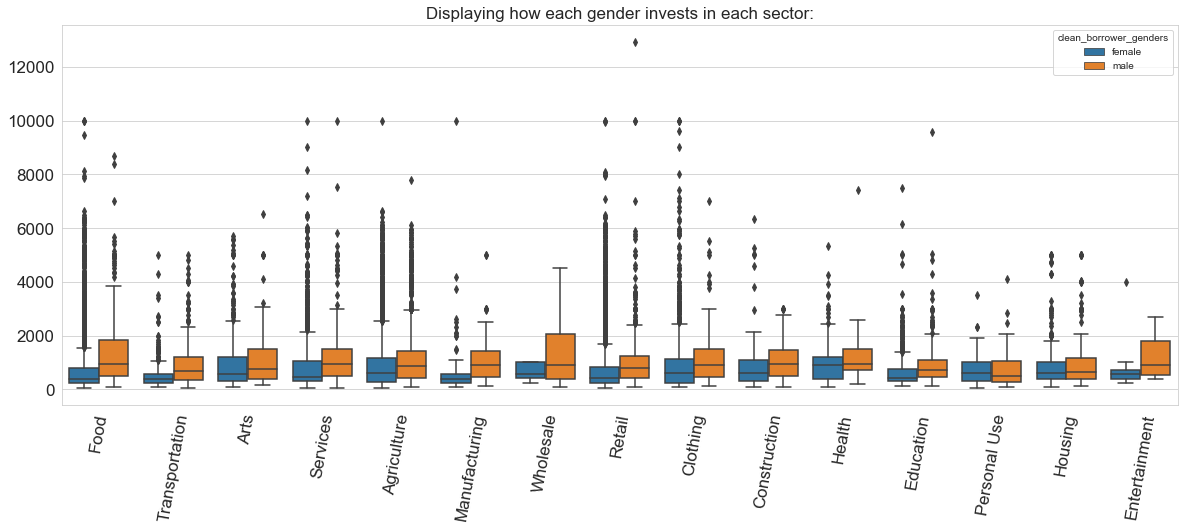

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation for demonstration
# df = pd.read_csv('your_file.csv')

# Print column names to verify
print(df.columns)

# Check for leading/trailing spaces and strip them if necessary
df.columns = df.columns.str.strip()

# Verify the column names again
print(df.columns)

# Create the plot if the columns are correct
if 'sector' in df.columns and 'loan_amount' in df.columns and 'clean_borrower_genders' in df.columns:
    plt.figure(figsize=(20, 7))

    boxplot = sns.boxplot(x='sector', y='loan_amount', data=df, hue='clean_borrower_genders')

    boxplot.set(xlabel='', ylabel='')
    plt.title('Displaying how each gender invests in each sector:', fontsize=17)
    plt.xticks(rotation=80, fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()
else:
    print("One or more required columns are missing in the DataFrame.")

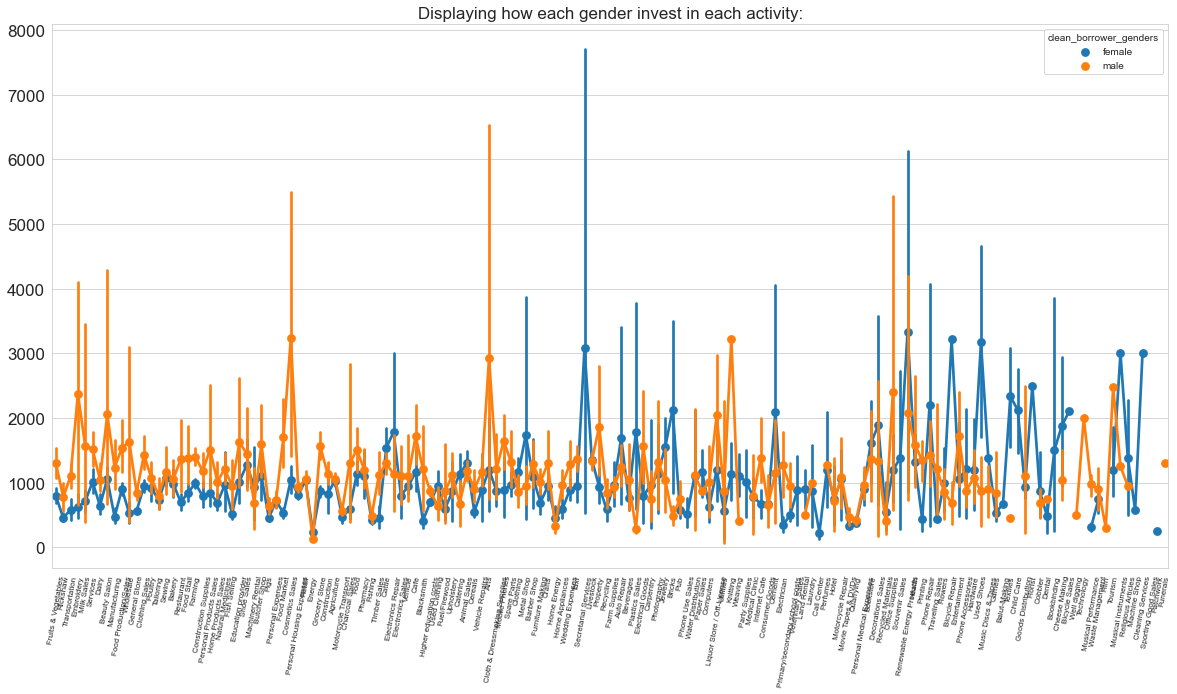

In [41]:
plt.figure(figsize=(20,10))

boxplot = sns.pointplot(x='activity', y='loan_amount', data=df, hue='clean_borrower_genders')
boxplot.set(xlabel='', ylabel='')
plt.title('Displaying how each gender invest in each activity:', fontsize=17)
plt.xticks(rotation=80, fontsize=8)
plt.yticks(fontsize=17)
plt.show()

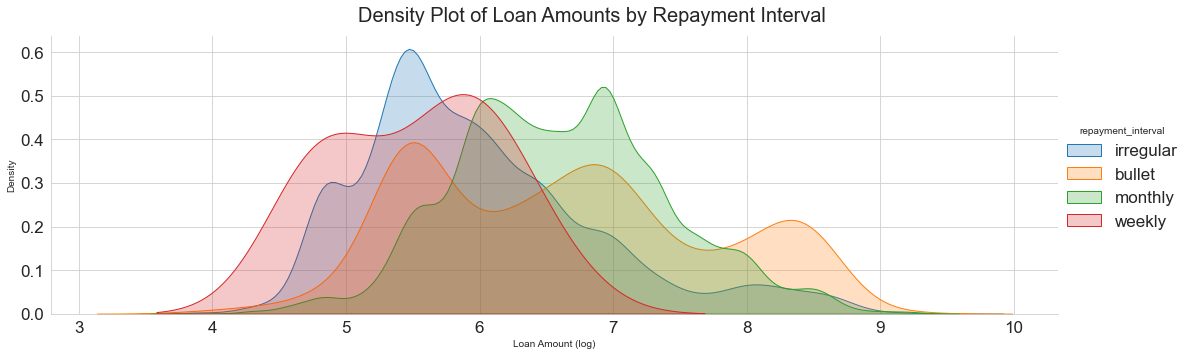

In [42]:


df['loan_amount_log'] = np.log(df['loan_amount'])

facetgrid = sns.FacetGrid(df, hue='repayment_interval', height=5, aspect=3)

facetgrid = (facetgrid.map(sns.kdeplot, 'loan_amount_log', shade=True)
             .set_axis_labels('Loan Amount (log)', 'Density')
             .add_legend(fontsize=17))

plt.subplots_adjust(top=0.9)
facetgrid.fig.suptitle('Density Plot of Loan Amounts by Repayment Interval', fontsize=20)
plt.show()


In [43]:
df.columns


Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'loan_amount_log', 'clean_borrower_genders'],
      dtype='object')

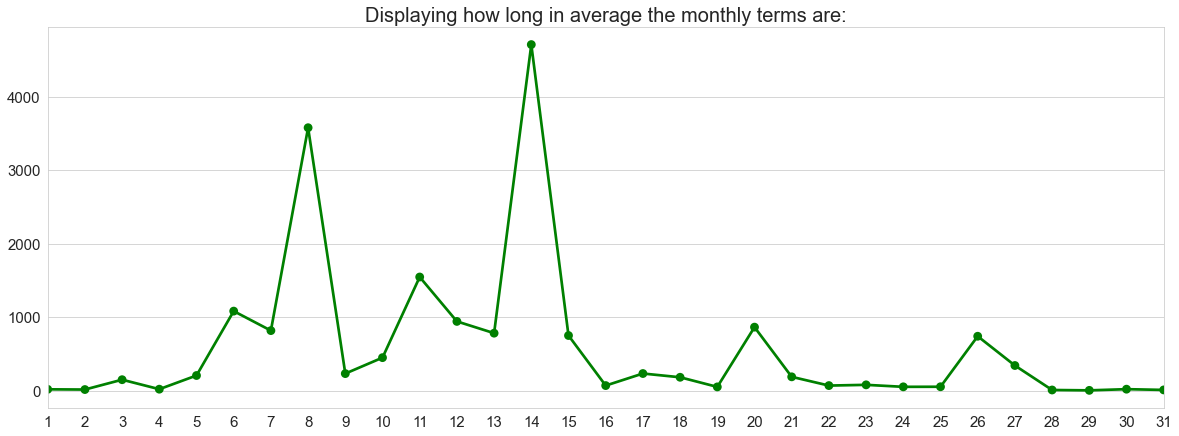

In [44]:
kiva_terms = pd.DataFrame(df['term_in_months'].value_counts(sort='country'))
kiva_terms.reset_index(inplace=True)
kiva_terms.columns = ['term_in_months', 'total_amount']

plt.figure(figsize=(20, 7))

pointplot = sns.pointplot(x=kiva_terms['term_in_months'], y=kiva_terms['total_amount'], color='g')
pointplot.set(xlabel='', ylabel='')
plt.title('Displaying how long in average the monthly terms are:', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 30)
plt.show()

In [45]:
#statical data of KIVA_LOANS

In [46]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,loan_amount_log
count,1.929600e+04,19296.000000,19296.000000,18897.000000,19296.000000,19296.000000,19296.000000
mean,6.712659e+05,888.234608,918.129405,153.601259,14.329136,26.679364,6.367345
std,5.969369e+04,1045.467570,1089.548091,62.466337,9.052456,30.361407,0.917295
min,6.530470e+05,0.000000,50.000000,9.000000,1.000000,0.000000,3.912023
25%,6.579728e+05,275.000000,275.000000,119.000000,8.000000,9.000000,5.616771
50%,6.628265e+05,525.000000,525.000000,145.000000,13.000000,17.000000,6.263398
75%,6.676782e+05,1025.000000,1050.000000,185.000000,14.000000,33.000000,6.956545
max,1.080546e+06,12925.000000,12925.000000,355.000000,137.000000,408.000000,9.466919


In [47]:
#Visual analysis


In [48]:
df['sector'].value_counts().head(10).reset_index()

,index,sector
0,Food,4389
1,Agriculture,4286
2,Retail,3923
3,Services,1432
4,Education,1100
5,Clothing,1050
6,Housing,1027
7,Transportation,670
8,Personal Use,412
9,Arts,298


In [49]:
ksector_loans = df.groupby('sector')['loan_amount'].sum().sort_values(ascending=False).reset_index().head(10)

In [50]:
ksector_loans

,sector,loan_amount
0,Agriculture,4491325
1,Food,3792825
2,Retail,3228675
3,Services,1551125
4,Clothing,1114300
5,Housing,891750
6,Education,829650
7,Transportation,508575
8,Arts,335225
9,Personal Use,288500


In [51]:
retail=df[df['sector']=='Retail'].reset_index(drop=True)

In [52]:
retail_activities = retail.groupby ('activity')['loan_amount'].sum().sort_values(ascending=False).reset_index().head(10)

In [53]:
retail_activities

,activity,loan_amount
0,General Store,1107325
1,Retail,994075
2,Cosmetics Sales,188575
3,Home Products Sales,120150
4,Shoe Sales,100100
5,Charcoal Sales,94275
6,Personal Products Sales,92150
7,Jewelry,53325
8,Renewable Energy Products,45700
9,Bookstore,43375


In [67]:
from sklearn.tr
# Select relevant features and target variable
features = ['funded_amount', 'clean_borrower_genders', 'term_in_months', 'lender_count', 'loan_amount_log','sector','activity','region','country_code']
target = 'loan_amount'
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder



# Initialize LabelEncoder
label_encoder = LabelEncoder()
df['clean_borrower_genders'] = label_encoder.fit_transform(df['clean_borrower_genders'])
df['sector'] = label_encoder.fit_transform(df['sector'])
df['activity'] = label_encoder.fit_transform(df['activity'])
df['region'] = label_encoder.fit_transform(df['region'])
df['country'] = label_encoder.fit_transform(df['country'])
df['country_code'] = label_encoder.fit_transform(df['country_code'])

# Encode the target variable if it is categorical
df[target] = df[target].astype('category').cat.codes

# Prepare the feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Train the SVM model
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train_imputed, y_train)

# Predict and evaluate the model
y_pred = svm.predict(X_test)

# Check the accuracy on the training and testing set
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

print('Training set accuracy: ', train_accuracy)
print('Testing set accuracy: ', test_accuracy)

# Calculate and print the accuracy on the testing set
accuracy = test_accuracy * 100
print("Accuracy_SVM:", accuracy)


Training set accuracy:  0.5198885721689557
Testing set accuracy:  0.49533678756476685
Accuracy_SVM: 49.53367875647668


In [70]:
from sklearn.metrics import accuracy_score

In [71]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Replace NaN values with mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use the same imputer for test data

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0)

# Train the model
rf_classifier.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Optionally, you can also evaluate other metrics as needed


Accuracy: 0.9396373056994819


In [74]:
X_train_imputed.shape

(15436, 9)

In [76]:
import joblib

In [78]:
# # Save the model and the imputer for future use
joblib.dump(rf_classifier, 'rf_classifier.pkl')

['rf_classifier.pkl']

In [ ]:
# # Import necessary libraries
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.impute import SimpleImputer
# import joblib

# # Load your data here (replace with your actual data loading code)
# # Example:
# # X, y = load_your_data_function()
# # For demonstration, I'll use dummy data
# X = np.random.rand(100, 10)
# y = np.random.randint(0, 2, 100)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Handle missing values by replacing NaNs with the mean of each column
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)
# X_test_imputed = imputer.transform(X_test)  # Use the same imputer for test data

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10]
# }

# # Initialize the RandomForestClassifier
# rf_classifier = RandomForestClassifier(random_state=0)

# # Initialize GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# # Perform grid search to find the best parameters
# grid_search.fit(X_train_imputed, y_train)

# # Get the best parameters and the best cross-validation score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-validation Accuracy: {best_score}")

# # Train the model with the best parameters
# best_rf_classifier = RandomForestClassifier(random_state=0, **best_params)
# best_rf_classifier.fit(X_train_imputed, y_train)

# # Predict on the test set
# y_pred = best_rf_classifier.predict(X_test_imputed)

# # Evaluate the model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy}")

# # Save the model and the imputer for future use
# joblib.dump(best_rf_classifier, 'best_rf_classifier.pkl')


# # Optionally, you can also evaluate other metrics as needed


In [ ]:
# Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}